In [1]:
from rubin_sim.phot_utils import Bandpass, Sed
import numpy as np
from rubin_sim.data import get_data_dir
import os
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
dd = get_data_dir()

In [3]:
bp1 = Bandpass()
bp1.read_throughput(os.path.join(dd,'throughputs/baseline/total_r.dat'))

In [4]:
bp2 = Bandpass(wavelen=bp1.wavelen[::4], sb=bp1.sb[::4])

/Users/yoachim/git_repos/rubin_sim/rubin_sim/phot_utils/bandpass.py:100: UserWarning: Wavelength sampling of 0.4 nm is > 0.2 nm, this may not work well with a Sed object. Consider resampling with resample_bandpass method.
  warnings.warn(


In [5]:
sed = Sed()
sed.read_sed_flambda(os.path.join(dd,'seds/starSED/kurucz/km30_5000.fits_g15_5220.gz'))

In [6]:
sed.calc_mag(bp1), sed.calc_mag(bp2)

(-18.783547148709967, -18.78354517590218)

In [7]:
n = len(bp1.wavelen)
idx = np.sort(np.random.choice(np.arange(0,n, 1, ), int(n/2)))

In [8]:
bp2 = Bandpass(wavelen=bp1.wavelen[idx], sb=bp1.sb[idx])
sed.calc_mag(bp1), sed.calc_mag(bp2)

/Users/yoachim/git_repos/rubin_sim/rubin_sim/phot_utils/bandpass.py:100: UserWarning: Wavelength sampling of 1.6 nm is > 0.2 nm, this may not work well with a Sed object. Consider resampling with resample_bandpass method.
  warnings.warn(


(-18.783547148709967, -18.78360202191281)

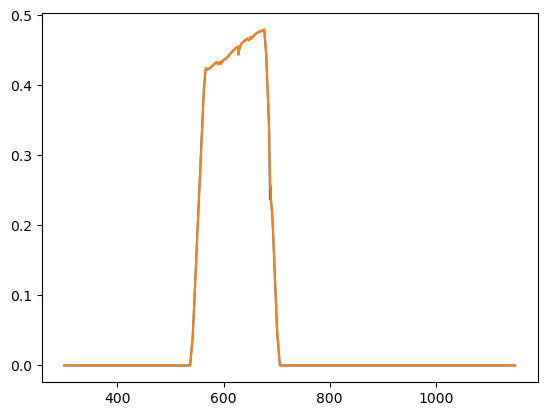

In [9]:
plt.plot(bp1.wavelen, bp1.sb)
plt.plot(bp1.wavelen[idx], bp1.sb[idx])

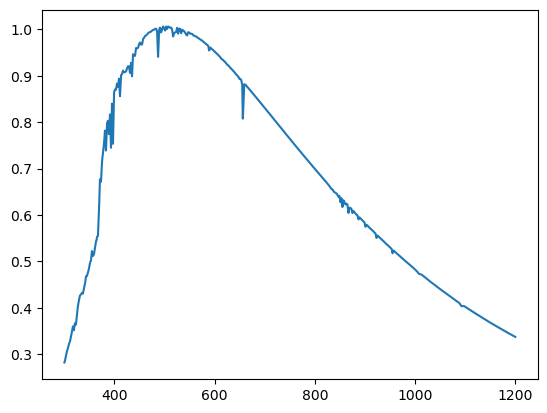

In [10]:
plt.plot(sed.wavelen, sed.flambda)

In [11]:
bp2.phi

array([0., 0., 0., ..., 0., 0., 0.])

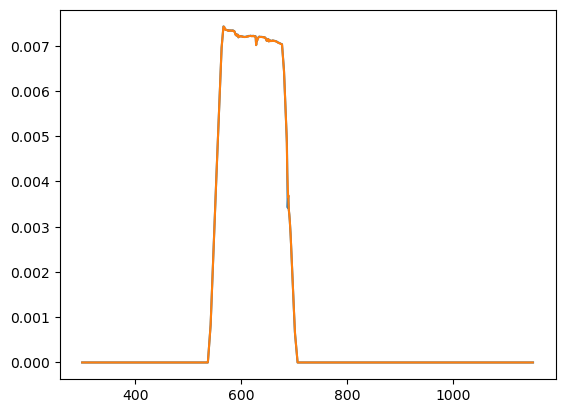

In [12]:
plt.plot(bp1.wavelen, bp1.phi)
plt.plot(bp2.wavelen, bp2.phi)